In [1]:
## Load the SPARSim R package
library(SPARSim)

## Create the simulation parameter

In [2]:
# Simulate
# - 1 condition
# - 8 genes (skewed internal distribution)
# - 300 cells
# - 3 library size scenarios (high, medium, low)

# Number of genes
N_gene <- 8 

# Gene intensity
gene_int <- c( 80,  30,   15,  10,  10,   5,   3,   0) 

# Gene variability
gene_var <- c(0.05, 0.1,  0.1, 0.2, 0.5, 1.0, 5.0, 1.0) 

# Gene names
gene_IDs <- c("Gene_1", "Gene_2" ,"Gene_3", "Gene_4", "Gene_5", "Gene_6", "Gene_7", "Gene_8") 

# Number of cells to simulated
N_cell <- 300 

# Simulate 300 cells with a constant library size of 50 
lib_size_high <- rep(150, times = N_cell)

# Simulate 300 cells with a constant library size of 50 
lib_size_med <- rep(50, times = N_cell)

# Simulate 300 cells with a constant library size of 20 
lib_size_low <- rep(20, times = N_cell)

In [3]:
# create simulation parameter with high library size
cond_high_param <- SPARSim_create_simulation_parameter(intensity =  gene_int, 
                                                      variability = gene_var,
                                                      library_size = lib_size_high,
                                                      feature_names = gene_IDs,
                                                      condition_name = "condition_high")

# create simulation parameter with medium library size
cond_med_param <- SPARSim_create_simulation_parameter(intensity =  gene_int, 
                                                      variability = gene_var,
                                                      library_size = lib_size_med,
                                                      feature_names = gene_IDs,
                                                      condition_name = "condition_med")

# create simulation parameter with low library size
cond_low_param <- SPARSim_create_simulation_parameter(intensity =  gene_int, 
                                                      variability = gene_var,
                                                      library_size = lib_size_low,
                                                      feature_names = gene_IDs,
                                                      condition_name = "condition_low")

## Simulate with SPARSim

In [13]:
# simulate count matrix with high sequencing depth
set.seed(7)
sim_results_high <- SPARSim_simulation(dataset_parameter = list(cond_high_param))

Number of experimental conditions:  1 
Number of genes:  8 
Number of cells:  300 
Setting gene expression intensity...  
Setting gene expression variability ...  
Simulating biological variability ...  
Simulating technical variability ...  


In [14]:
# simulate count matrix with medium sequencing depth
set.seed(7)
sim_results_med <- SPARSim_simulation(dataset_parameter = list(cond_med_param))

Number of experimental conditions:  1 
Number of genes:  8 
Number of cells:  300 
Setting gene expression intensity...  
Setting gene expression variability ...  
Simulating biological variability ...  
Simulating technical variability ...  


In [15]:
# simulate count matrix with medium sequencing depth
set.seed(7)
sim_results_low <- SPARSim_simulation(dataset_parameter = list(cond_low_param))

Number of experimental conditions:  1 
Number of genes:  8 
Number of cells:  300 
Setting gene expression intensity...  
Setting gene expression variability ...  
Simulating biological variability ...  
Simulating technical variability ...  


## Check simulation results

In [16]:
gene_expr <- round(sim_results_high$gene_matrix)  # simulated gene expression level
count_high <- sim_results_high$count_matrix       # simulated raw count matrix with high sequencing depth
count_med <- sim_results_med$count_matrix         # simulated raw count matrix with medium sequencing depth
count_low <- sim_results_low$count_matrix         # simulated raw count matrix with low sequencing depth

In [17]:
# function to compute the sparsity
compute_sparsity <- function(input_matrix){
  return (100 * sum(input_matrix==0) / (ncol(input_matrix)*nrow(input_matrix))  )
}

### Sparsity

In [18]:
# sparsity of simulated gene expression level (i.e. percentage of biological zeros)
compute_sparsity(gene_expr)

[1] 20.33333

In [19]:
# sparsity of raw count matrix with high sequencing depth (i.e. percentage of biological zeros and technical zeros)
compute_sparsity(count_high)

[1] 22.29167

In [20]:
# sparsity of raw count matrix with medium sequencing depth (i.e. percentage of biological zeros and technical zeros)
compute_sparsity(count_med)

[1] 28.79167

In [21]:
# sparsity of raw count matrix with low sequencing depth (i.e. percentage of biological zeros and technical zeros)
compute_sparsity(count_low)

[1] 40.625

### Plot gene histograms

In [22]:
# function to plot the histograms of the simulated genes
plot_histogram <- function(input_matrix, xlabel, color){
  for(gene in rownames(input_matrix)){ # for each gene
    # compute gene sparsity
    gene_sparsity <- round( 100*sum(input_matrix[gene,]==0) / ncol(input_matrix) , 2)
    # plot histogram of raw counts
    hist(input_matrix[gene,], xlim = c(0,max(input_matrix[gene,]*2)),
         main = paste0(gene,"\n sparsity: ", gene_sparsity," %"), col =  color, xlab = xlabel)
  }
}

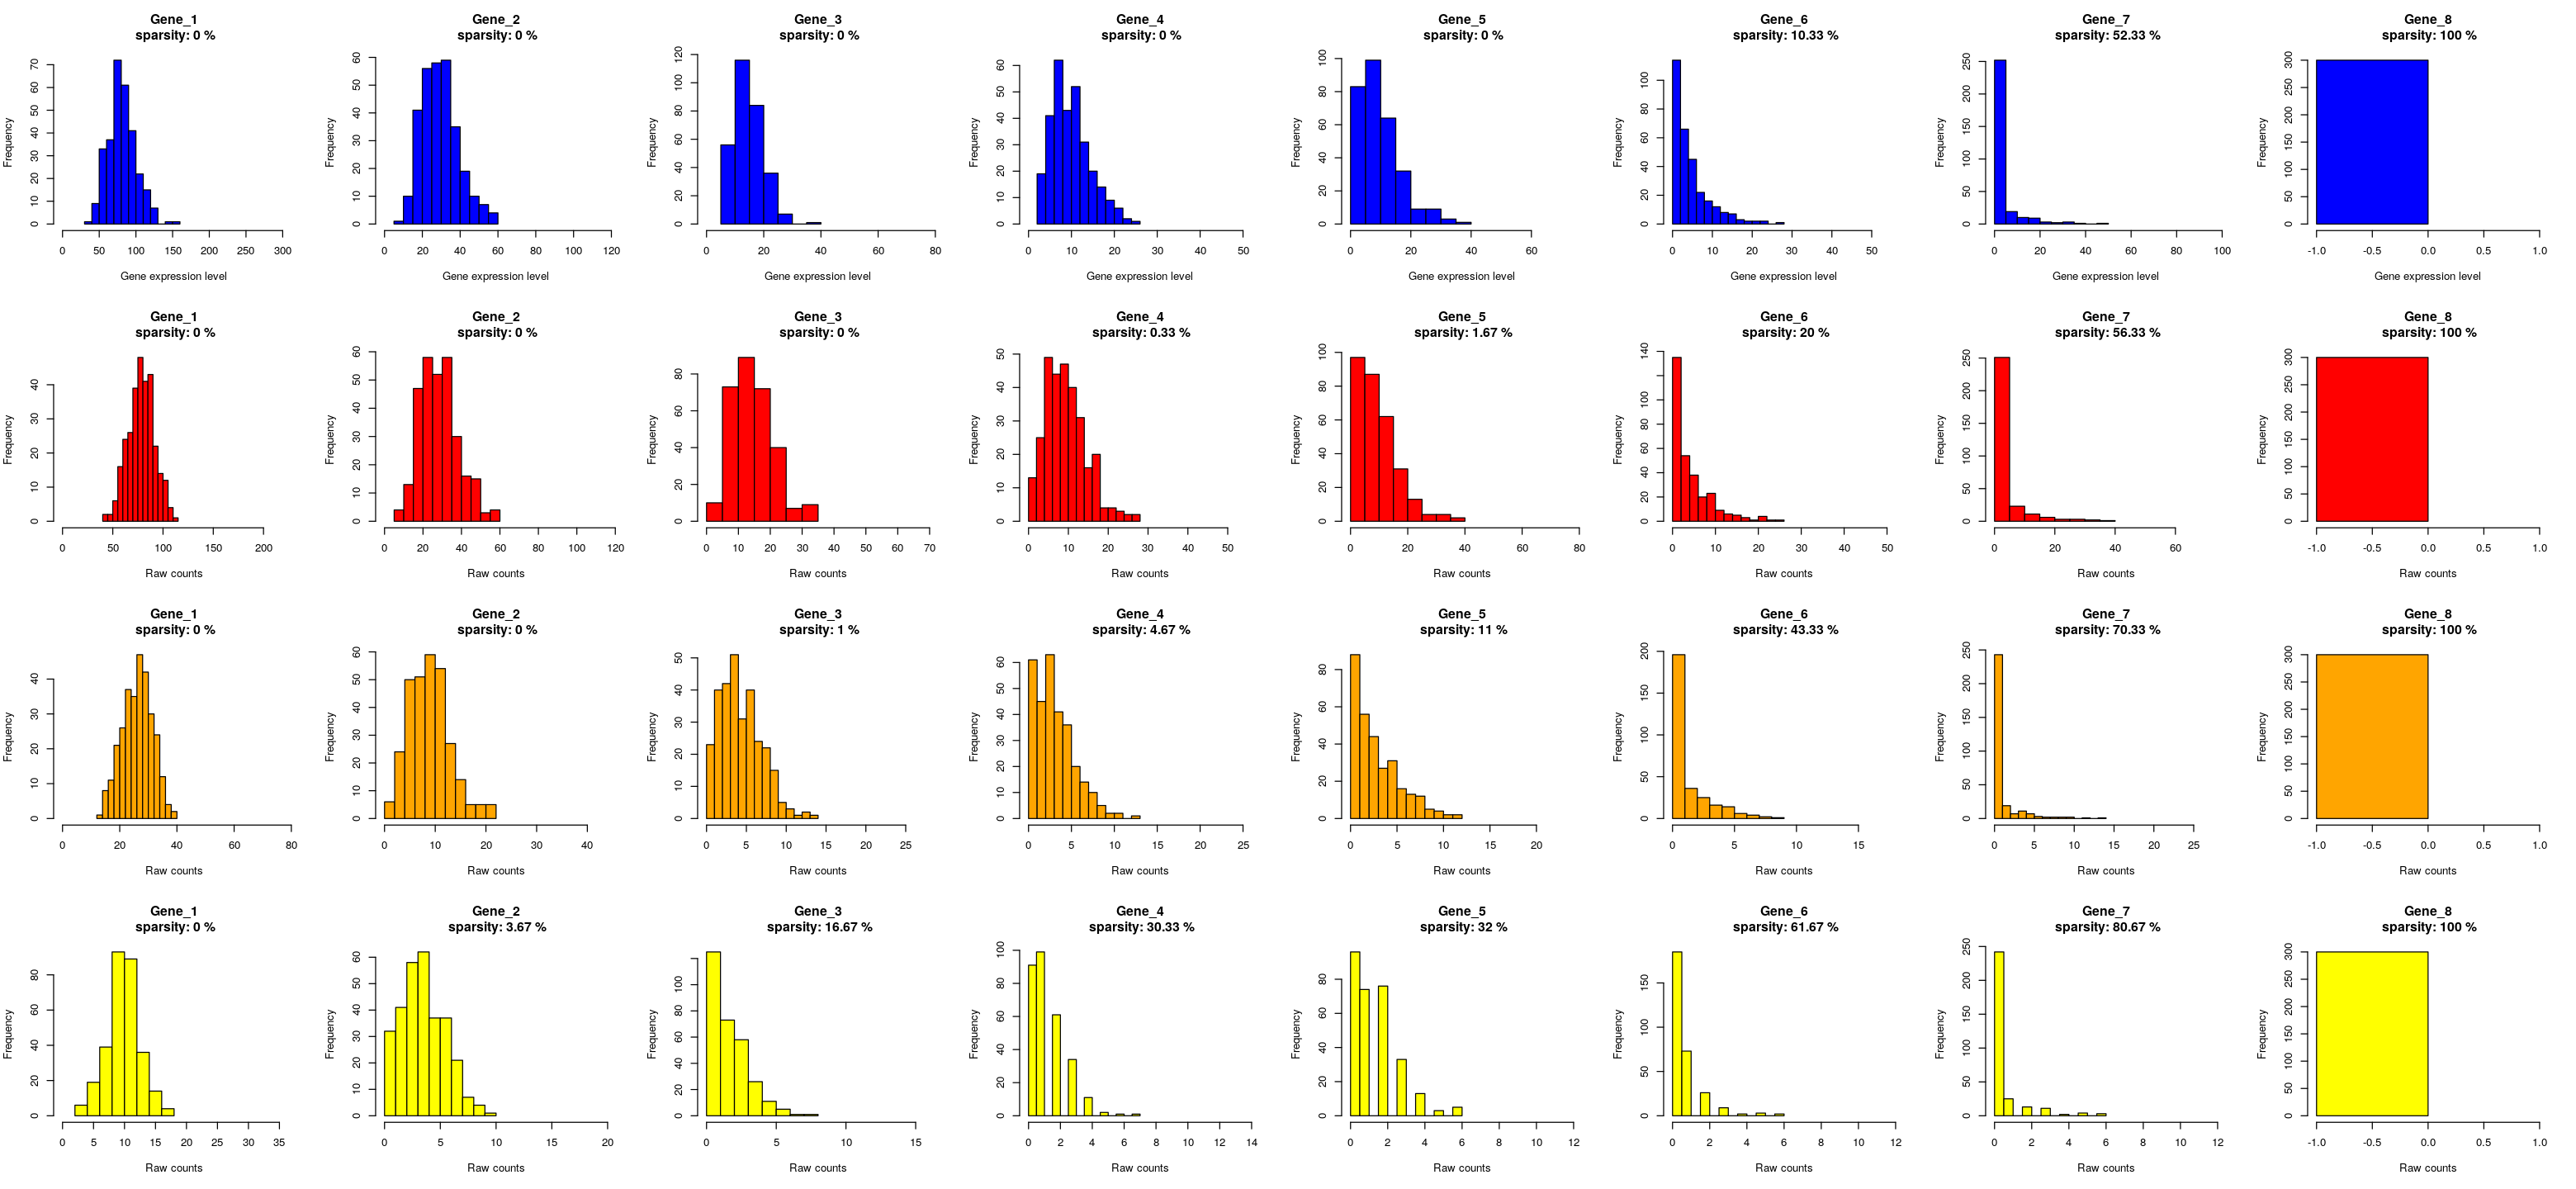

In [23]:
par(mfrow=c(4,8))
options(repr.plot.width=26, repr.plot.height=12) # plot size

plot_histogram(input_matrix = gene_expr,  xlabel = "Gene expression level", color = "blue")  # simulated gene expression level
plot_histogram(input_matrix = count_high, xlabel = "Raw counts", color = "red")              # raw count matrix with high sequencing depth
plot_histogram(input_matrix = count_med,  xlabel = "Raw counts", color = "orange")           # raw count matrix with medium sequencing depth
plot_histogram(input_matrix = count_low,  xlabel = "Raw counts", color = "yellow")           # raw count matrix with low sequencing depth

### Save data on .csv files

In [24]:
write.csv(gene_expr, file = "Example2_gene_expr.csv")
write.csv(count_high, file = "Example2_raw_count_high.csv")
write.csv(count_med, file = "Example2_raw_count_med.csv")
write.csv(count_low, file = "Example2_raw_count_low.csv")